## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np

import matplotlib.pyplot as plt

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


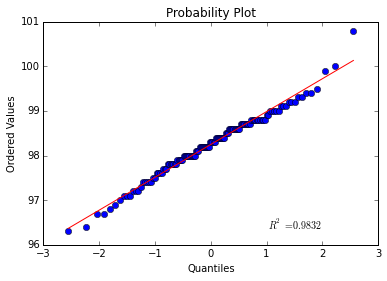

In [4]:
#test for normality
#
stats.probplot(df['temperature'], dist="norm", plot=plt)
plt.show()

In [5]:
stats.normaltest(df['temperature'])

(2.7038014333192031, 0.2587479863488254)

In [6]:
#H0: mean = 98.6
#H1: mean != 98.6

# n>30, use Z-test. In this case t and z test will produce similar answers because n is large
# test at 95% 2 tailed, critical value = 1.96

mean=98.6
samplemean=df['temperature'].mean()
samplestd=df['temperature'].std()
criticalvalue = 1.96

Zstat= (mean - samplemean) / (samplestd / np.sqrt(len(df)))
print('Z stat:', Zstat)
print('Critical value:', criticalvalue)
print('Result:')
if Zstat>criticalvalue:
    print('Reject null hypothesis. The mean temperature is not 98.6')
else:
    print('Accept null hypothesis. The mean temperature is 98.6')
    


Z stat: 5.45482329236
Critical value: 1.96
Result:
Reject null hypothesis. The mean temperature is not 98.6


In [7]:
#define abnormal as temperature outside 95% CI
#Z-score 95% CI = 1.96
low = samplemean - 1.96 * (samplestd / np.sqrt(len(df)))
high = samplemean + 1.96 * (samplestd / np.sqrt(len(df)))
ci95 = (low, high)
print('Abnormal temperatures lie outside this range:', ci95)


Abnormal temperatures lie outside this range: (98.123194112228518, 98.375267426233037)


In [8]:
#Is there a significant difference between males and females in normal temperature?
#Set up and solve for a two sample hypothesis testing.

# H0: maletemp - femaletemp = 0 
# H1: maletemp - femaletemp != 0

def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat

maletemp = df[df['gender'] == 'M']['temperature']
femaletemp = df[df['gender'] == 'F']['temperature']

tempdiffbetweengenders=TestStatistic((maletemp, femaletemp))
maletempvar=maletemp.var()
femaletempvar=femaletemp.var()

# test at 95% 2 tailed. Z score 1.96. critical value = 1.96 * standard deviation of the difference between means
criticalval = 1.96 * np.sqrt(maletempvar/len(maletemp) + femaletempvar/len(femaletemp))
print('Difference in temperatures:',tempdiffbetweengenders)
print('Critical value:',criticalval)
print('Result:')
if tempdiffbetweengenders > criticalval:
    print('Reject null hypothesis. There is a significant difference in temperatures between genders')
else:
    print('Accept null hypothesis. There is no significant difference in temperatures between genders')


Difference in temperatures: 0.289230769230727
Critical value: 0.248045742823
Result:
Reject null hypothesis. There is a significant difference in temperatures between genders
